In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
filename1 = 'logs/blackbox-25_Jan_2019_17_10_04.log'
filename2 = 'logs/blackbox-25_Jan_2019_17_20_05.log'
#filename3 = 'logs/blackbox-25_Jan_2019_14_07_37.log'
#filename4 = 'logs/blackbox-25_Jan_2019_15_48_46.log'

In [3]:
log_df1 = pd.read_csv(filename1, index_col=False, sep=';')
log_df2 = pd.read_csv(filename2, index_col=False, sep=';')
#log_df3 = pd.read_csv(filename3, index_col=False, sep=';')
#log_df4 = pd.read_csv(filename4, index_col=False, sep=';')

In [4]:
#print(log_df4.shape)
#log_df4.dropna(inplace=True)
#print(log_df4.shape)
#log_df4['vel_rms'] = (log_df4["left_right_vel"] **2 + log_df4["for_back_vel"] ** 2 + log_df4["up_down_vel"] **2 + log_df4["yaw_vel"] **2)**.5
##log_df4['dist'] = (log_df4["target_x"] **2 + log_df4["target_y"] ** 2)**.5
#log_df4 = log_df4[~((log_df4.vel_rms == 0))]
#print(log_df4.shape)

In [5]:
cols = ["left_right_vel","for_back_vel","up_down_vel","yaw_vel","target_x","target_y","target_side_len"]

log_df1 = log_df1[log_df1["mode"] == "Track"][cols]
log_df2 = log_df2[log_df2["mode"] == "Track"][cols]
#log_df3 = log_df3[log_df3["mode"] == "Track"][cols]
#log_df4 = log_df4[cols]

log_df = log_df1.append(log_df2)#.append(log_df3)#.append(log_df4)
print(log_df.shape)
log_df = log_df.drop_duplicates()
print(log_df.shape)
log_df = log_df[~(log_df["target_side_len"] == 96)] #Kalman filter calculated target
print(log_df.shape)

(3866, 7)
(3858, 7)
(3851, 7)


In [6]:
log_df['vel_rms'] = (log_df["left_right_vel"] **2 + log_df["for_back_vel"] ** 2 + log_df["up_down_vel"] **2 + log_df["yaw_vel"] **2)**.5

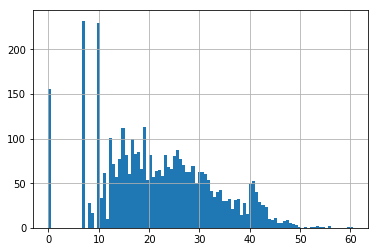

In [7]:
log_df.vel_rms.hist(bins=100)

In [8]:
balanced_log_df = log_df[log_df.vel_rms == 7].sample(frac=1)
balanced_log_df = log_df[log_df.vel_rms == 0].sample(frac=1).append(balanced_log_df)
balanced_log_df = balanced_log_df.append(log_df[log_df.vel_rms > 7])
balanced_log_df = balanced_log_df.sample(frac=1).reset_index(drop=True)
balanced_log_df.describe()

,left_right_vel,for_back_vel,up_down_vel,yaw_vel,target_x,target_y,target_side_len,vel_rms
count,3851.000000,3851.000000,3851.000000,3851.000000,3851.000000,3851.000000,3851.000000,3851.000000
mean,0.343807,2.150870,0.621397,0.231109,472.109842,354.747079,227.061023,21.688652
std,9.340608,13.814723,16.399493,6.314410,210.157355,132.073792,86.378630,11.026070
min,-24.000000,-40.000000,-40.000000,-16.000000,0.000000,0.000000,65.000000,0.000000
25%,-7.000000,-7.000000,-9.000000,0.000000,366.000000,278.500000,170.000000,13.379088
50%,0.000000,0.000000,0.000000,0.000000,472.000000,348.000000,227.000000,20.639767
75%,7.000000,11.000000,10.000000,7.000000,570.000000,436.000000,258.000000,29.223273
max,24.000000,40.000000,40.000000,16.000000,960.000000,720.000000,707.000000,60.473135


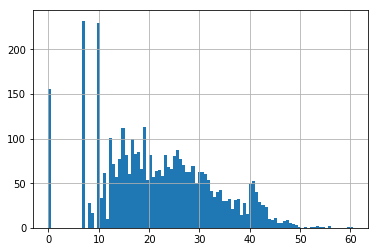

In [9]:
balanced_log_df.vel_rms.hist(bins=100)

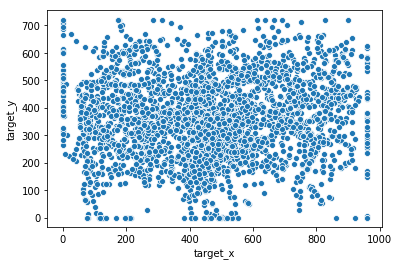

In [10]:
ax = sns.scatterplot(x="target_x", y="target_y", data=balanced_log_df)

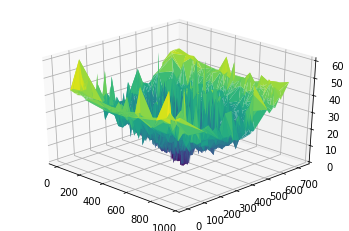

In [11]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(balanced_log_df['target_x'],
                balanced_log_df['target_y'],
                balanced_log_df['vel_rms'],
                cmap=plt.cm.viridis,
                linewidth=0.2)
ax.view_init(30, -45)
plt.show()

In [12]:
cols_vel = ["left_right_vel","for_back_vel","up_down_vel","yaw_vel"]
cols_x_pos = ["target_x","target_side_len"]
cols_y_pos = ["target_y"]
norm_flight_data_df = balanced_log_df[cols_vel]/40.0
norm_flight_data_df[cols_x_pos] = balanced_log_df[cols_x_pos]/960.0
norm_flight_data_df[cols_y_pos] = balanced_log_df[cols_y_pos]/720.0

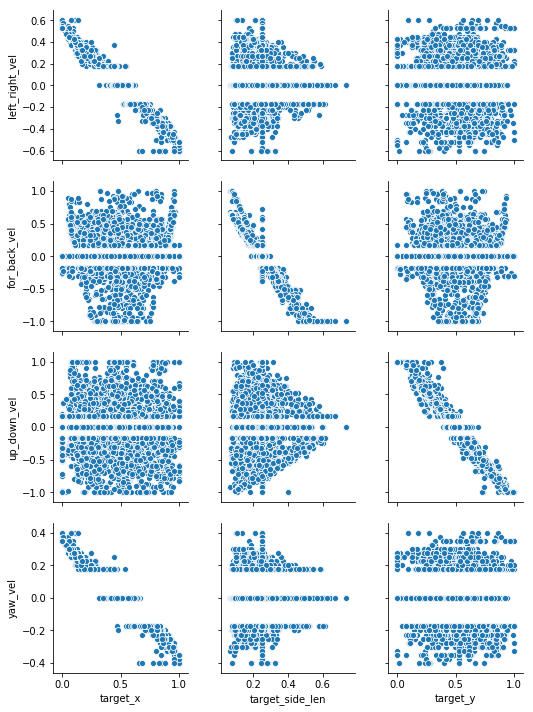

In [13]:
g = sns.pairplot(norm_flight_data_df, x_vars=(cols_x_pos + cols_y_pos), y_vars=cols_vel)

In [15]:
norm_flight_data_df

,left_right_vel,for_back_vel,up_down_vel,yaw_vel,target_x,target_side_len,target_y
0,0.425,0.400,0.525,0.275,0.079167,0.154167,0.252778
1,0.175,0.175,0.000,0.000,0.419792,0.226042,0.495833
2,0.200,0.250,0.200,0.175,0.252083,0.181250,0.429167
3,0.200,0.325,-0.175,0.175,0.256250,0.164583,0.555556
4,0.000,0.200,0.000,0.000,0.508333,0.195833,0.481944
5,0.000,0.425,0.000,0.000,0.532292,0.126042,0.518056
6,0.175,-0.275,-0.200,0.000,0.403125,0.303125,0.568056
7,0.000,-0.175,0.225,0.000,0.509375,0.286458,0.394444
8,-0.400,0.175,-0.175,-0.250,0.894792,0.209375,0.580556
9,-0.175,0.000,0.000,0.000,0.614583,0.231250,0.502778


In [14]:
norm_flight_data_df.to_csv(path_or_buf="logs/norm_flight_data.csv", sep=";", index=False)